[PyTorch CIFAR10 Tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn, optim

import torchvision
from torchvision import models
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, transforms

In [2]:
batch_size = 64
num_epochs = 2
dropout_rate = 0.15

In [3]:
device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
data_directory_path = "../data/"

cifar10_transforms = Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Training data loader
train_dataset = CIFAR10(
    root=data_directory_path, train=True, download=True, transform=cifar10_transforms
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

# Validation data loader
valid_dataset = CIFAR10(
    root=data_directory_path, train=False, download=True, transform=cifar10_transforms
)

valid_loader = torch.utils.data.DataLoader(
    valid_dataset, batch_size=len(valid_dataset), shuffle=True
)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

train_dataset.data.shape, valid_dataset.data.shape

Files already downloaded and verified
Files already downloaded and verified


((50000, 32, 32, 3), (10000, 32, 32, 3))

      deer      plane       frog      horse       ship      horse        cat      plane
     horse      truck      horse      plane      plane       bird        cat       bird
       cat      horse       deer        car       frog      plane        cat      horse
      bird      truck       bird       ship      plane       deer       ship       deer
       dog      horse        car        dog      truck       frog      plane       ship
      deer       frog       frog      horse       ship      horse      truck        dog
      ship        dog       frog       deer      plane      truck        dog       deer
      bird        dog       bird       ship      horse        cat       frog       bird


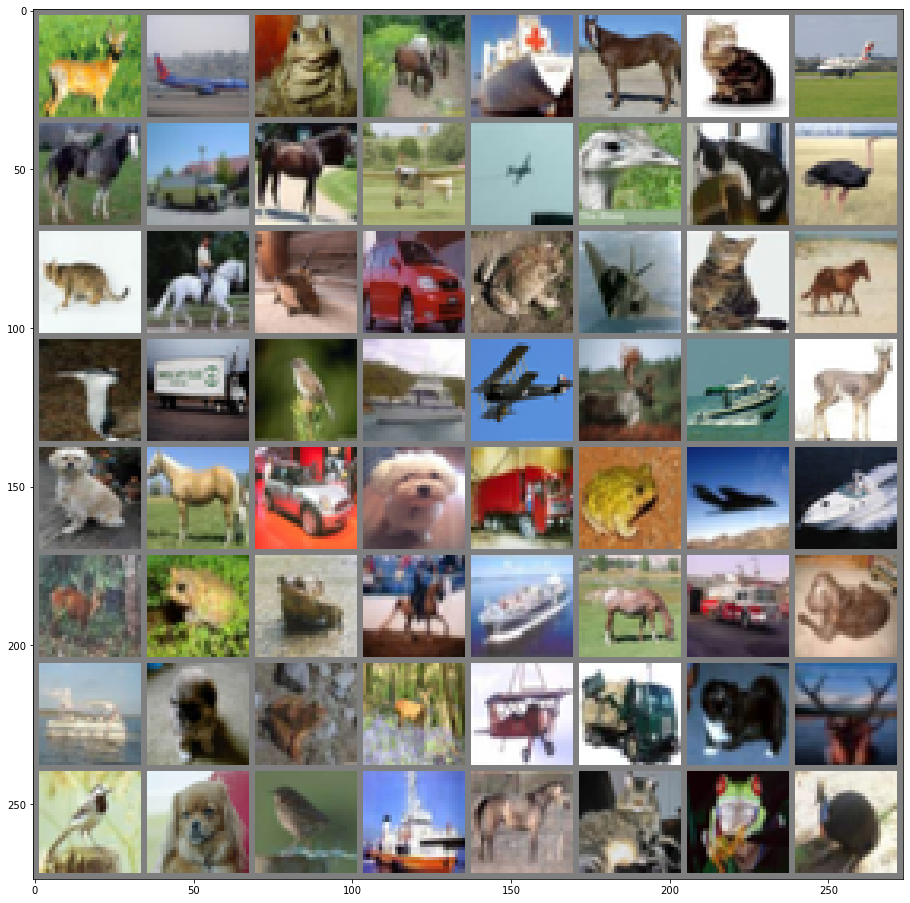

In [5]:
def imshow(img):
    # Unnormalize the image
    img = img / 2 + 0.5
    npimg = img.numpy()

    # Matplotlib expects images to be height by width by color
    axis.imshow(np.transpose(npimg, (1, 2, 0)))


_, axis = plt.subplots(figsize=(16, 16))

# Grab a batch of images and labels
images, labels = next(iter(train_loader))
imshow(torchvision.utils.make_grid(images))

label_names = [f"{classes[label]:>10}" for label in labels]
images_per_row = int(np.sqrt(batch_size))
for row in range(images_per_row):
    start_index = row * images_per_row
    print(" ".join(label_names[start_index:start_index+images_per_row]))

In [6]:
images.shape, labels.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [7]:
# model = nn.Sequential(nn.Flatten(), nn.Linear(3*32*32, 10))

# model = nn.Sequential(
#     nn.Flatten(), nn.Linear(3 * 32 * 32, 100), nn.ReLU(), nn.Linear(100, 10)
# )

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3 * 32 * 32, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
)

# model = nn.Sequential(
#     nn.Conv2d(3, 6, 5),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     nn.Conv2d(6, 16, 5),
#     nn.ReLU(),
#     nn.MaxPool2d(2, 2),
#     nn.Flatten(),
#     nn.Linear(16 * 5 * 5, 120),
#     nn.ReLU(),
#     nn.Linear(120, 84),
#     nn.ReLU(),
#     nn.Linear(84, 10),
# )

# model = models.resnet18()

model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=10, bias=True)
)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [9]:
for epoch in range(num_epochs):

    train_loss_total = 0.0

    for images, labels in train_loader:
        
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        optimizer.zero_grad()

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        train_loss_total += loss.item()

    print(f"Training loss at epoch {epoch}/{num_epochs}:", train_loss_total)

print("Finished Training")

Training loss at epoch 0/2: 1286.6272473335266
Training loss at epoch 1/2: 1146.5865733623505
Finished Training


In [10]:
correct = 0
total = 0

class_correct = [0 for _ in classes]
class_total = [0 for _ in classes]

with torch.no_grad():

    for images, labels in valid_loader:

        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        predictions = outputs.argmax(dim=1, keepdim=True)
        
        comparisons = predictions.eq(labels.view_as(predictions))
        for comp, label in zip(comparisons, labels):
            class_correct[label] += comp.item()
            class_total[label] += 1

        total += labels.shape[0]
        correct += int(comparisons.double().sum().item())
        
accuracy = correct / total
print(f"Accuracy on validation set: {correct}/{total} = {accuracy*100:.2f}%")

for i, cls in enumerate(classes):
    ccorrect = class_correct[i]
    ctotal = class_total[i]
    caccuracy = ccorrect / ctotal
    print(f"  Accuracy on {cls:>5} class: {ccorrect}/{ctotal} = {caccuracy*100:.2f}%")

Accuracy on validation set: 4683/10000 = 46.83%
  Accuracy on plane class: 542/1000 = 54.20%
  Accuracy on   car class: 732/1000 = 73.20%
  Accuracy on  bird class: 274/1000 = 27.40%
  Accuracy on   cat class: 174/1000 = 17.40%
  Accuracy on  deer class: 233/1000 = 23.30%
  Accuracy on   dog class: 426/1000 = 42.60%
  Accuracy on  frog class: 702/1000 = 70.20%
  Accuracy on horse class: 599/1000 = 59.90%
  Accuracy on  ship class: 611/1000 = 61.10%
  Accuracy on truck class: 390/1000 = 39.00%
